In [1]:
import pandas as pd

df = pd.read_csv(r"C:\Users\velut\OneDrive\Documents\New folder\output\all_stocks.csv")
print(df.head())

       Ticker    close                 date    high      low    month    open  \
0        SBIN   602.95  2023-10-03 05:30:00   604.9   589.60  2023-10   596.6   
1  BAJFINANCE  7967.60  2023-10-03 05:30:00  7975.5  7755.00  2023-10  7780.8   
2       TITAN  3196.25  2023-10-03 05:30:00  3212.5  3114.40  2023-10  3148.8   
3         ITC   439.75  2023-10-03 05:30:00   442.9   439.25  2023-10   441.0   
4         TCS  3513.85  2023-10-03 05:30:00  3534.2  3480.10  2023-10  3534.2   

     volume  
0  15322196  
1    944555  
2   1007308  
3   7481883  
4   1948148  


In [2]:
df['date'] = pd.to_datetime(df['date'])
print(df['date'].head())

0   2023-10-03 05:30:00
1   2023-10-03 05:30:00
2   2023-10-03 05:30:00
3   2023-10-03 05:30:00
4   2023-10-03 05:30:00
Name: date, dtype: datetime64[ns]


In [3]:
df = df.sort_values(by=['Ticker', 'date'])
df['prev_close'] = df.groupby('Ticker')['close'].shift(1)
df['daily_return'] = (df['close'] - df['prev_close']) / df['prev_close']
print(df[['Ticker', 'date', 'close', 'prev_close', 'daily_return']].head(10))

       Ticker                date    close  prev_close  daily_return
24   ADANIENT 2023-10-03 05:30:00  2387.25         NaN           NaN
74   ADANIENT 2023-10-04 05:30:00  2464.95     2387.25      0.032548
124  ADANIENT 2023-10-05 05:30:00  2466.35     2464.95      0.000568
174  ADANIENT 2023-10-06 05:30:00  2478.10     2466.35      0.004764
224  ADANIENT 2023-10-09 05:30:00  2442.60     2478.10     -0.014325
274  ADANIENT 2023-10-10 05:30:00  2498.30     2442.60      0.022804
324  ADANIENT 2023-10-11 05:30:00  2488.60     2498.30     -0.003883
374  ADANIENT 2023-10-12 05:30:00  2506.35     2488.60      0.007133
424  ADANIENT 2023-10-13 05:30:00  2454.55     2506.35     -0.020668
474  ADANIENT 2023-10-16 05:30:00  2429.35     2454.55     -0.010267


In [4]:
volatility = df.groupby('Ticker')['daily_return'].std().reset_index()
volatility.columns = ['Ticker', 'volatility']
print(volatility.head())

       Ticker  volatility
0    ADANIENT    0.028601
1  ADANIPORTS    0.026029
2  APOLLOHOSP    0.014135
3  ASIANPAINT    0.012665
4    AXISBANK    0.015625


In [5]:
top10 = volatility.sort_values(by='volatility', ascending=False).head(10)
print(top10)


        Ticker  volatility
0     ADANIENT    0.028601
1   ADANIPORTS    0.026029
8          BEL    0.023283
47       TRENT    0.023074
34        ONGC    0.022247
10        BPCL    0.022069
39  SHRIRAMFIN    0.021687
13   COALINDIA    0.021411
21    HINDALCO    0.019587
33        NTPC    0.019475


In [6]:
top10.to_csv(r'C:\Users\velut\OneDrive\Documents\New folder\output\final_volatility_top10.csv', index=False)

C:\Users\velut\AppData\Local\Temp\ipykernel_30532\3657368217.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ticker', y='volatility', data=top10, palette='viridis')


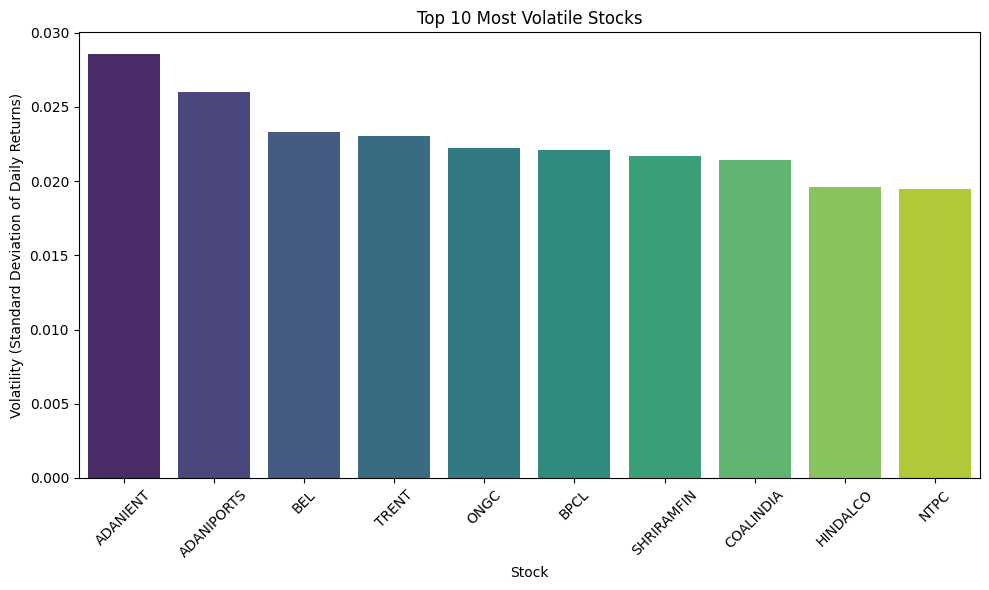

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Ticker', y='volatility', data=top10, palette='viridis')
plt.title('Top 10 Most Volatile Stocks')
plt.ylabel('Volatility (Standard Deviation of Daily Returns)')
plt.xlabel('Stock')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()